<a href="https://colab.research.google.com/github/pymoux/wildfires_DST/blob/main/wildfires_data_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
db_file_15 = "/content/drive/MyDrive/DST_Wildfires/2015/FPA_FOD_20170508.sqlite"

con = sqlite3.connect(db_file_15)
df_wild = pd.read_sql_query("SELECT * from Fires", con, index_col='OBJECTID')

con.close()


In [4]:
df_wild.head(10)


,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
6,6,FS-1418849,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,54,...,A,38.635278,-120.103611,5.0,USFS,CA,5,005,Amador,b'\x00\x01\xad\x10\x00\x00\xf0<~\x90\xa1\x06^\...
7,7,FS-1418851,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,58,...,A,38.688333,-120.153333,5.0,USFS,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00$o\x996\xd0\t^\xc0h\...
8,8,FS-1418854,FED,FS-FIRESTAT,FS,USCASHF,Shasta-Trinity National Forest,0514,Shasta-Trinity National Forest,3,...,B,40.968056,-122.433889,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00t)\xe8\xd5\xc4\x9b^\...
9,9,FS-1418856,FED,FS-FIRESTAT,FS,USCASHF,Shasta-Trinity National Forest,0514,Shasta-Trinity National Forest,5,...,B,41.233611,-122.283333,13.0,STATE OR PRIVATE,CA,None,None,None,"b'\x00\x01\xad\x10\x00\x00\xdc\x8d\x1e""""\x92^\..."


## Transform dates

#### Discovery date

In [5]:
# discovery date from YEAR + DoY into Gregorian date format
df_wild["DISCO_DATE"] = pd.to_datetime(df_wild["FIRE_YEAR"]*1000 + df_wild["DISCOVERY_DOY"], format = "%Y%j")

df_wild[["DISCOVERY_DATE", "FIRE_YEAR", "DISCOVERY_DOY", "DISCO_DATE"]].head()


,DISCOVERY_DATE,FIRE_YEAR,DISCOVERY_DOY,DISCO_DATE
OBJECTID,,,,
1,2453403.5,2005,33,2005-02-02
2,2453137.5,2004,133,2004-05-12
3,2453156.5,2004,152,2004-05-31
4,2453184.5,2004,180,2004-06-28
5,2453184.5,2004,180,2004-06-28


#### FIRE_DURATION column

In [6]:
df_wild['FIRE_DURATION'] = (df_wild['CONT_DATE'] - df_wild['DISCOVERY_DATE']).astype('Int64')
df_wild['FIRE_DURATION'].value_counts()

# 38 "outliers" de 730 jours et plus


FIRE_DURATION
0      806199
1      104954
2       24476
3       11641
4        6772
        ...  
248         1
332         1
240         1
290         1
397         1
Name: count, Length: 314, dtype: Int64

## Remove useless columns

In [7]:
# select columns of interest for the analysis
df_interest = df_wild[["FOD_ID",
                       "FPA_ID",
                       "FIRE_YEAR",
                       "DISCO_DATE",
                       "STAT_CAUSE_CODE",
                       "STAT_CAUSE_DESCR",
                       "FIRE_SIZE",
                       "FIRE_SIZE_CLASS",
                       "FIRE_DURATION",
                       "LATITUDE",
                       "LONGITUDE",
                       "STATE",
                       "COUNTY",
                       "FIPS_CODE",
                       "FIPS_NAME"]]
df_interest.head()


,FOD_ID,FPA_ID,FIRE_YEAR,DISCO_DATE,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,FIRE_DURATION,LATITUDE,LONGITUDE,STATE,COUNTY,FIPS_CODE,FIPS_NAME
OBJECTID,,,,,,,,,,,,,,,
1,1,FS-1418826,2005,2005-02-02,9.0,Miscellaneous,0.10,A,0,40.036944,-121.005833,CA,63,063,Plumas
2,2,FS-1418827,2004,2004-05-12,1.0,Lightning,0.25,A,0,38.933056,-120.404444,CA,61,061,Placer
3,3,FS-1418835,2004,2004-05-31,5.0,Debris Burning,0.10,A,0,38.984167,-120.735556,CA,17,017,El Dorado
4,4,FS-1418845,2004,2004-06-28,1.0,Lightning,0.10,A,5,38.559167,-119.913333,CA,3,003,Alpine
5,5,FS-1418847,2004,2004-06-28,1.0,Lightning,0.10,A,5,38.559167,-119.933056,CA,3,003,Alpine


In [8]:
# drop useless columns
df_interest_2 = df_wild.drop(columns=['SOURCE_SYSTEM_TYPE',
                                      'SOURCE_SYSTEM',
                                      'NWCG_REPORTING_AGENCY',
                                      'NWCG_REPORTING_UNIT_ID',
                                      'NWCG_REPORTING_UNIT_NAME',
                                      'SOURCE_REPORTING_UNIT',
                                      'SOURCE_REPORTING_UNIT_NAME',
                                      'LOCAL_FIRE_REPORT_ID',
                                      'LOCAL_INCIDENT_ID',
                                      'FIRE_CODE',
                                      'FIRE_NAME',
                                      'ICS_209_INCIDENT_NUMBER',
                                      'ICS_209_NAME',
                                      'MTBS_ID',
                                      'MTBS_FIRE_NAME',
                                      'COMPLEX_NAME',
                                      'OWNER_CODE',
                                      'OWNER_DESCR',
                                      'Shape'])


## Fill missing county values

### charging geometry datasets

In [9]:
# define geometry points
gdf = gpd.GeoDataFrame(df_interest[['FOD_ID', 'LATITUDE', 'LONGITUDE', 'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME']], geometry=gpd.points_from_xy(df_interest['LONGITUDE'], df_interest['LATITUDE']))
gdf.crs = 'EPSG:4326'
gdf.head()


,FOD_ID,LATITUDE,LONGITUDE,STATE,COUNTY,FIPS_CODE,FIPS_NAME,geometry
OBJECTID,,,,,,,,
1,1,40.036944,-121.005833,CA,63,063,Plumas,POINT (-121.00583 40.03694)
2,2,38.933056,-120.404444,CA,61,061,Placer,POINT (-120.40444 38.93306)
3,3,38.984167,-120.735556,CA,17,017,El Dorado,POINT (-120.73556 38.98417)
4,4,38.559167,-119.913333,CA,3,003,Alpine,POINT (-119.91333 38.55917)
5,5,38.559167,-119.933056,CA,3,003,Alpine,POINT (-119.93306 38.55917)


In [10]:
# load counties geometry from US census
gdf_counties = gpd.read_file("/content/drive/MyDrive/DST_Wildfires/geopandas/tl_2023_us_county.shp")
gdf_counties = gdf_counties[['GEOID', 'STATEFP', 'COUNTYFP', 'NAME', 'geometry']]
gdf_counties = gdf_counties.rename(columns={"NAME": "COUNTYNAME"})
gdf_counties.crs = 'EPSG:4326'


In [11]:
# load states geometry from US census
gdf_states = gpd.read_file("/content/drive/MyDrive/DST_Wildfires/geopandas/tl_2023_us_state.shp")
gdf_states = gdf_states[['STATEFP', 'STUSPS', 'NAME']]
gdf_states = gdf_states.rename(columns={"NAME": "STATENAME"})
gdf_states.crs = 'EPSG:4326'

# load states areas
states_area = pd.read_csv("/content/drive/MyDrive/DST_Wildfires/geopandas/states_area.tsv",
                          sep='\t',
                          skiprows=2,
                          usecols=['State', 'Total_area_SqMi', 'Land_area_SqMi', 'Total_water_area_SqMi'])
# convert square miles to acres
for col_sm, col_a in zip(['Total_area_SqMi', 'Land_area_SqMi', 'Total_water_area_SqMi'], ['Total_area_acres', 'Land_area_acres', 'Total_water_area_acres']):
  states_area[col_a] = states_area[col_sm].apply(lambda x: int(x.replace(',', '')) / 0.0015625)

gdf_states = pd.merge(left=gdf_states, right=states_area[['State', 'Total_area_acres', 'Land_area_acres',	'Total_water_area_acres']], left_on='STATENAME', right_on='State', how='left')
gdf_states.drop(columns='State', inplace=True)
#gdf_states = gdf_states.rename(columns={"NAME": "STATENAME"})
gdf_states.head()

,STATEFP,STUSPS,STATENAME,Total_area_acres,Land_area_acres,Total_water_area_acres
0,54,WV,West Virginia,15507200.0,15384320.0,122880.0
1,12,FL,Florida,42085120.0,34320000.0,7765120.0
2,17,IL,Illinois,37064960.0,35532160.0,1532800.0
3,27,MN,Minnesota,55639040.0,50961280.0,4677760.0
4,24,MD,Maryland,7939840.0,6212480.0,1727360.0


['Alaska Interagency', 'Eastern Area', 'Great Basin', 'Northern California', 'Northern Rockies', 'Northwest Interagency', 'Rocky Mountain', 'Southern Area', 'Southern California', 'Southwest Area']


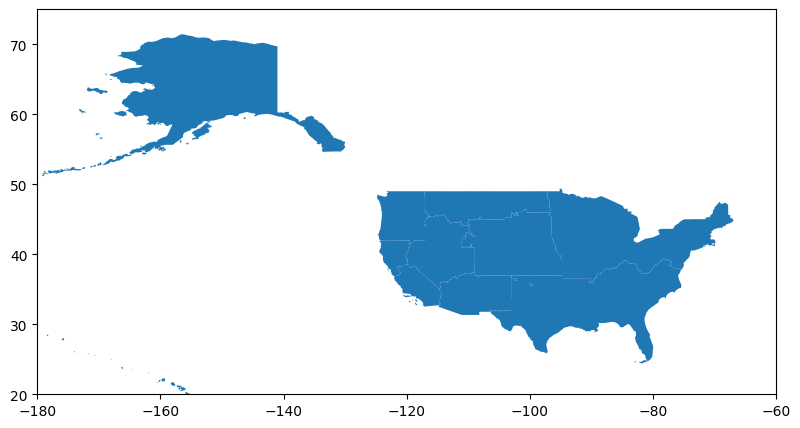

In [12]:
# load GACC geometry from XXX
gdf_GACC = gpd.read_file("/content/drive/MyDrive/DST_Wildfires/geopandas/National_GACC_Current_20240115_dissolve.shp")
gdf_GACC['GACC_area'] = gdf_GACC['GACCName'].str.split(' ').str[:2].str.join(' ')
gdf_GACC = gdf_GACC[['GACC_area', 'geometry']]
#gdf_GACC = gdf_states.rename(columns={"NAME": "STATENAME"})

print(list(gdf_GACC['GACC_area'].unique()))

fig, ax = plt.subplots(figsize=(10, 5))
gdf_GACC.plot(ax=ax)
ax.set_xlim(-180, -60)
ax.set_ylim(20, 75);

In [13]:
# merge states gdf to counties gdf
gdf_counties = pd.merge(left=gdf_counties, right=gdf_states[['STATEFP', 'STUSPS', 'STATENAME']], on='STATEFP')

### merging geographical data with wildfire dataset

In [14]:
# identify missing counties by joining on geometry
joined_gdf = gpd.sjoin(gdf, gdf_counties, how='left', op='within')
#new_df = new_df.rename(columns={'NAME': 'new_counties'})
joined_gdf.drop(columns='index_right', inplace=True)
joined_gdf.head(10)


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,FOD_ID,LATITUDE,LONGITUDE,STATE,COUNTY,FIPS_CODE,FIPS_NAME,geometry,GEOID,STATEFP,COUNTYFP,COUNTYNAME,STUSPS,STATENAME
OBJECTID,,,,,,,,,,,,,,
1,1,40.036944,-121.005833,CA,63,063,Plumas,POINT (-121.00583 40.03694),06063,06,063,Plumas,CA,California
2,2,38.933056,-120.404444,CA,61,061,Placer,POINT (-120.40444 38.93306),06017,06,017,El Dorado,CA,California
3,3,38.984167,-120.735556,CA,17,017,El Dorado,POINT (-120.73556 38.98417),06017,06,017,El Dorado,CA,California
4,4,38.559167,-119.913333,CA,3,003,Alpine,POINT (-119.91333 38.55917),06003,06,003,Alpine,CA,California
5,5,38.559167,-119.933056,CA,3,003,Alpine,POINT (-119.93306 38.55917),06003,06,003,Alpine,CA,California
6,6,38.635278,-120.103611,CA,5,005,Amador,POINT (-120.10361 38.63528),06005,06,005,Amador,CA,California
7,7,38.688333,-120.153333,CA,17,017,El Dorado,POINT (-120.15333 38.68833),06017,06,017,El Dorado,CA,California
8,8,40.968056,-122.433889,CA,None,None,None,POINT (-122.43389 40.96806),06089,06,089,Shasta,CA,California
9,9,41.233611,-122.283333,CA,None,None,None,POINT (-122.28333 41.23361),06093,06,093,Siskiyou,CA,California


In [15]:
# identify GACC areas
joined_gdf2 = gpd.sjoin(gdf, gdf_GACC, how='left', op='within')
joined_gdf2.drop(columns='index_right', inplace=True)
joined_gdf2.head(10)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,FOD_ID,LATITUDE,LONGITUDE,STATE,COUNTY,FIPS_CODE,FIPS_NAME,geometry,GACC_area
OBJECTID,,,,,,,,,
1,1,40.036944,-121.005833,CA,63,063,Plumas,POINT (-121.00583 40.03694),Northern California
2,2,38.933056,-120.404444,CA,61,061,Placer,POINT (-120.40444 38.93306),Northern California
3,3,38.984167,-120.735556,CA,17,017,El Dorado,POINT (-120.73556 38.98417),Northern California
4,4,38.559167,-119.913333,CA,3,003,Alpine,POINT (-119.91333 38.55917),Northern California
5,5,38.559167,-119.933056,CA,3,003,Alpine,POINT (-119.93306 38.55917),Northern California
6,6,38.635278,-120.103611,CA,5,005,Amador,POINT (-120.10361 38.63528),Northern California
7,7,38.688333,-120.153333,CA,17,017,El Dorado,POINT (-120.15333 38.68833),Northern California
8,8,40.968056,-122.433889,CA,None,None,None,POINT (-122.43389 40.96806),Northern California
9,9,41.233611,-122.283333,CA,None,None,None,POINT (-122.28333 41.23361),Northern California


In [16]:
# merge new location to dataframe
df_interest = pd.merge(df_interest, joined_gdf[['FOD_ID', 'GEOID', 'STATEFP', 'COUNTYFP', 'COUNTYNAME', 'STUSPS', 'STATENAME']], on='FOD_ID')
df_interest = pd.merge(df_interest, joined_gdf2[['FOD_ID', 'GACC_area']], on='FOD_ID')

df_interest.head()


,FOD_ID,FPA_ID,FIRE_YEAR,DISCO_DATE,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,FIRE_DURATION,LATITUDE,...,COUNTY,FIPS_CODE,FIPS_NAME,GEOID,STATEFP,COUNTYFP,COUNTYNAME,STUSPS,STATENAME,GACC_area
0,1,FS-1418826,2005,2005-02-02,9.0,Miscellaneous,0.10,A,0,40.036944,...,63,063,Plumas,06063,06,063,Plumas,CA,California,Northern California
1,2,FS-1418827,2004,2004-05-12,1.0,Lightning,0.25,A,0,38.933056,...,61,061,Placer,06017,06,017,El Dorado,CA,California,Northern California
2,3,FS-1418835,2004,2004-05-31,5.0,Debris Burning,0.10,A,0,38.984167,...,17,017,El Dorado,06017,06,017,El Dorado,CA,California,Northern California
3,4,FS-1418845,2004,2004-06-28,1.0,Lightning,0.10,A,5,38.559167,...,3,003,Alpine,06003,06,003,Alpine,CA,California,Northern California
4,5,FS-1418847,2004,2004-06-28,1.0,Lightning,0.10,A,5,38.559167,...,3,003,Alpine,06003,06,003,Alpine,CA,California,Northern California


### analysis of new fields

In [17]:
# wilfires without any location
nana_index = df_interest[(df_interest['FIPS_CODE'].isna()) & (df_interest['COUNTYFP'].isna())].index
df_interest.loc[nana_index, ['STATE','LATITUDE','LONGITUDE']]

#TO COMPLETE MANUALLY?

,STATE,LATITUDE,LONGITUDE
308961,AZ,32.691400,-114.734400
308996,AZ,32.700000,-114.730000
1063465,AZ,31.951100,-113.051900
1065586,AZ,32.592000,-114.799700
1650995,TX,26.066667,-97.980278


In [18]:
# wilfires without new location
na_index = df_interest[(df_interest['COUNTYFP'].isna())].index
df_interest.loc[na_index, ['STATE', 'FIPS_NAME', 'LATITUDE','LONGITUDE']]


,STATE,FIPS_NAME,LATITUDE,LONGITUDE
24104,AZ,Santa Cruz,31.333056,-110.639444
25730,AZ,Cochise,31.333333,-110.320833
156246,AZ,Cochise,31.333056,-110.390278
172124,AZ,Santa Cruz,31.332500,-110.983056
308885,AZ,Yuma,32.566400,-114.792700
308961,AZ,None,32.691400,-114.734400
308996,AZ,None,32.700000,-114.730000
309006,AZ,Yuma,32.512000,-114.803000
714048,ME,Aroostook,47.183334,-68.883331
1063465,AZ,None,31.951100,-113.051900


In [19]:
# wilfires with divergent new location
div_index = df_interest[(df_interest['FIPS_NAME'] != df_interest['COUNTYNAME']) & (df_interest['FIPS_NAME'].notnull()) & (df_interest['COUNTYNAME'].notnull())].index
df_interest.loc[div_index, ['STATE', 'FIPS_NAME', 'LATITUDE', 'LONGITUDE', 'STUSPS', 'COUNTYNAME']]
#div_index


,STATE,FIPS_NAME,LATITUDE,LONGITUDE,STUSPS,COUNTYNAME
1,CA,Placer,38.933056,-120.404444,CA,El Dorado
13,CA,Amador,38.433333,-120.510000,CA,Calaveras
34,NM,Lincoln,33.255278,-105.626111,NM,Otero
36,NC,Buncombe,35.228333,-82.884444,NC,Transylvania
49,OR,Deschutes,44.410000,-121.315556,OR,Jefferson
...,...,...,...,...,...,...
1859487,NC,Lee,35.324672,-79.165937,NC,Harnett
1859975,KS,Russell,39.140000,-98.940000,KS,Osborne
1860027,KS,Greenwood,37.606667,-96.422500,KS,Elk
1860038,PR,Gurabo Municipio,18.260833,-65.985000,PR,Gurabo


In [20]:
# wildfires w/o GACC area
na_GACC = df_interest[(df_interest['GACC_area'].isna())]
na_GACC[['STATE', 'FIPS_NAME', 'LATITUDE', 'LONGITUDE', 'STUSPS', 'COUNTYNAME', 'GACC_area']]

# 18 rows


,STATE,FIPS_NAME,LATITUDE,LONGITUDE,STUSPS,COUNTYNAME,GACC_area
24104,AZ,Santa Cruz,31.333056,-110.639444,NaN,NaN,NaN
25730,AZ,Cochise,31.333333,-110.320833,NaN,NaN,NaN
156246,AZ,Cochise,31.333056,-110.390278,NaN,NaN,NaN
172124,AZ,Santa Cruz,31.332500,-110.983056,NaN,NaN,NaN
213190,AZ,None,31.334300,-109.786700,AZ,Cochise,NaN
240183,TX,None,29.209800,-102.890150,TX,Brewster,NaN
308885,AZ,Yuma,32.566400,-114.792700,NaN,NaN,NaN
308961,AZ,None,32.691400,-114.734400,NaN,NaN,NaN
308996,AZ,None,32.700000,-114.730000,NaN,NaN,NaN
309006,AZ,Yuma,32.512000,-114.803000,NaN,NaN,NaN


## duplicated rows?

In [21]:
df_interest[['FPA_ID', 'FIRE_YEAR', 'DISCO_DATE', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'FIRE_DURATION', 'LATITUDE', 'LONGITUDE',
       'GEOID', 'STATEFP', 'COUNTYFP', 'COUNTYNAME', 'STUSPS', 'STATENAME', 'GACC_area']].duplicated().sum()

0

## Export ready-to-use dataset

In [22]:
df_interest.to_csv('/content/drive/MyDrive/DST_Wildfires/db_output/wildfires15_db.csv', sep=',')
print('file ok')


file ok
